https://gist.github.com/fagonzalezo/29c022675ee263a80987

## Eficiencia de programas

In [0]:
import math
import numpy as np
import pylab as pl
from __future__ import unicode_literals
%matplotlib inline

## Problema:

Ordenar

In [0]:
num_datos = 10**7

números

## Programas:
Programa A:

Ordenamiento por inserción $O(n^2)$

Buena implementación ($2n^2 \textrm{inst}$)

Computador rápido: 10 mil millones de instrucciones por segundo ($10^{10} \frac{\textrm{inst}}{\textrm{seg}}$)

In [0]:
def tiempo_programa_A(n):
    return 2.0*(n**2)/(10**10)


Programa B:

Ordenamiento por mezcla $O(n\lg n)$

Mala implementación ($50 n\lg n\ \textrm{inst}$)

Computador lento: 10 millones de instrucciones por segundo ($10^{6} \frac{\textrm{inst}}{\textrm{seg}}$)

In [0]:
def tiempo_programa_B(n):
    return 50.0*n*np.log10(n)/(10**6)

Tiempo programa A:

In [6]:
ta = tiempo_programa_A(num_datos)
print(ta, "segs, ", ta/3600, "horas")

20000.0 segs,  5.555555555555555 horas


Tiempo programa B:

In [7]:
ta = tiempo_programa_B(num_datos)
print(ta, "segs, ", ta/3600, "horas")

3500.0 segs,  0.9722222222222222 horas


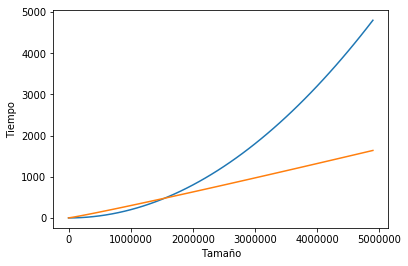

In [8]:
ns = np.arange(1,5*10**6,10**5)
pl.ylabel("Tiempo")
pl.xlabel('Tamaño')
pl.plot(ns, tiempo_programa_A(ns), ns, tiempo_programa_B(ns))

## Ordenamiento por inserción

In [0]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [11]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
print(B)
insertion_sort(B)
print(B)

[5, 4, 6, 3, 7, 2, 8, 1, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]



# Corrección

## Invariante de ciclo

Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

La siguiente función implementa la comprobación correspondiente al invariante de ciclo.


In [0]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [14]:
invariant([1, 2, 3, 4], [4, 3, 2, 1])

True

In [15]:
invariant([1, 2, 3, 4], [5, 3, 2, 1])

False

In [16]:
invariant([ 2,1, 3, 4, 4], [4, 3, 2, 1, 4])

False

La siguiente función incluye aserciones para verificar que el invariante de ciclo se cumpla. Si la función es correcta, estas aserciones no deberían fallar.

In [0]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [19]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print(B)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables

In [0]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print("Error en el invariante de ciclo!")
        print("j=", j)
        print("i=", i)
        print("A=", A)
        print("Original A=", original_A)

In [22]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_insertion_sort(B)

Error en el invariante de ciclo!
j= 2
i= 0
A= [5, 4, 6, 3, 7, 2, 8, 1, 9]
Original A= [5, 4, 6, 3, 7, 2, 8, 1, 9]


# Análisis del tiempo de ejecución

In [0]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print("Number of steps =", self.steps)
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [27]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9,10]
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()

Number of steps = 104


Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [0]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = [i for i in range(i)]
        rnd.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
    return results

In [33]:
print(exper_analysis(10))

[2, 2, 8, 20, 29, 29, 62, 71, 98, 119]


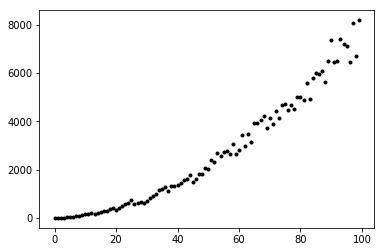

In [34]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

# Insertion Sort

In [0]:
import matplotlib.pyplot as plt
import itertools
import statistics

# numero de lineas

In [0]:
def insertionsort_instructions(array):
    steps = 1    ## asignacion for
    for i in range(1, len(array)):
        steps +1 ## comparacion
        x = array[i]; steps += 1
        j = i-1; steps += 1
        steps += 1; ## comparacion while
        while( (j > -1) and (array[j] > x) ):
            array[j+1] = array[j]; steps += 1
            j = j-1; steps += 1
            
        steps += 1 ## salida del while
        array[j+1] = x; steps +1;
        steps += 1 ## incremento

    steps += 1 ##
    #print(array)
    return steps

# numero de comparaciones

In [0]:
def insertionsort_comparations(array):
    steps = 0
    for i in range(1, len(array)):
        x = array[i]
        j = i-1
        while( (j > -1) and (array[j] > x) ):
            array[j+1] = array[j]
            j = j-1
            steps += 1

        if( j == -1):
            steps += 1
        array[j+1] = x

    #print(array)
    return steps

# numero de intercambios

In [0]:
def insertionsort_swaps(array):
    steps = 0
    for i in range(1, len(array)):
        x = array[i]
        j = i-1
        while( (j > -1) and (array[j] > x) ):
            array[j+1] = array[j]
            j = j-1
            steps += 1

        
        array[j+1] = x
        
    #print(array)
    return steps

# numero de preguntas en el while

In [0]:
def insertionsort_whilequestions(array):
    steps = 0
    for i in range(1, len(array)):
        x = array[i]
        j = i-1
        while( (j > -1) and (array[j] > x) ):
            array[j+1] = array[j]
            j = j-1
            steps += 2 # ambas condiciones

        steps += 1
        array[j+1] = x

    #print(array)
    return steps

## Plotting

In [0]:
def plotInsertionSort(n):        
    
    instructions = []
    comparations = []
    swaps = []
    whiles = []


    listPermutations = list(range(1,n+1))
    
    #Generando permutaciones
    permutations = (list(itertools.permutations(listPermutations)))
    print("Con {} elementos, se tiene un numero de Permutaciones: {}".format(n,len(permutations)))

    for permutation in permutations:
        permutation_as_list = list(permutation)
        instructions.append( insertionsort_instructions(permutation_as_list) )
        permutation_as_list = list(permutation)
        comparations.append( insertionsort_comparations(permutation_as_list) )
        permutation_as_list = list(permutation)
        swaps.append( insertionsort_swaps(permutation_as_list) )
        permutation_as_list = list(permutation)
        whiles.append( insertionsort_whilequestions(permutation_as_list) )
    
    
    #Graficas
    plt.hist(instructions, bins='auto')
    plt.title("Grafica de instruciones")
    plt.show()
    print("Promedio: {}".format(statistics.mean(instructions)))

    plt.hist(comparations, bins='auto')
    plt.title("Grafica de comparaciones")
    plt.show()
    print("Promedio: {}".format(statistics.mean(comparations)))

    plt.hist(swaps, bins='auto')
    plt.title("Grafica de intercambios")
    plt.show()
    print("Promedio: {}".format(statistics.mean(swaps)))    

    plt.hist(whiles, bins='auto')
    plt.title("Grafica de preguntas while")
    plt.show()
    print("Promedio: {}".format(statistics.mean(whiles))) 

Con 4 elementos, se tiene un numero de Permutaciones: 24


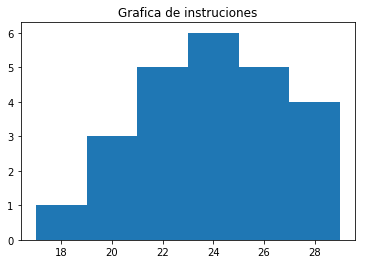

Promedio: 23


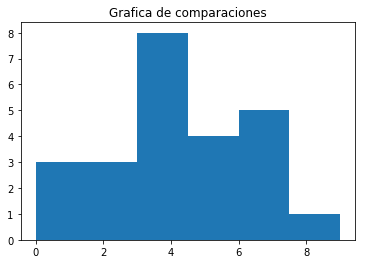

Promedio: 4.083333333333333


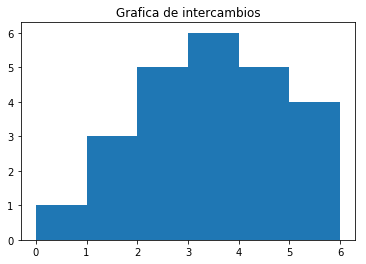

Promedio: 3


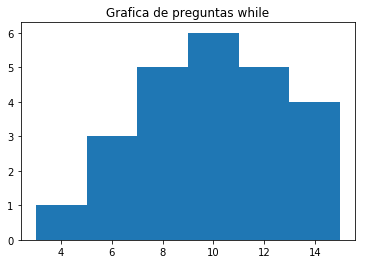

Promedio: 9


In [105]:
plotInsertionSort(4)

Con 5 elementos, se tiene un numero de Permutaciones: 120


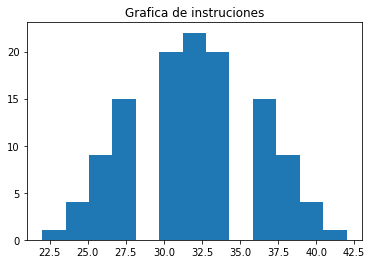

Promedio: 32


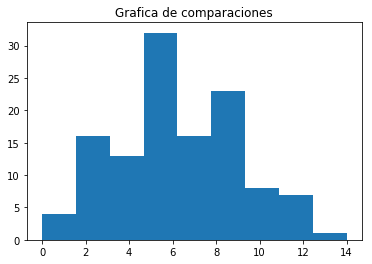

Promedio: 6.283333333333333


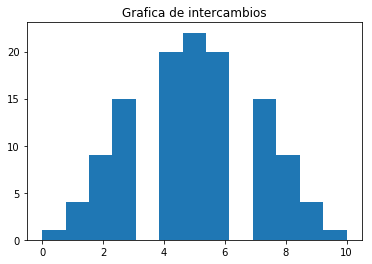

Promedio: 5


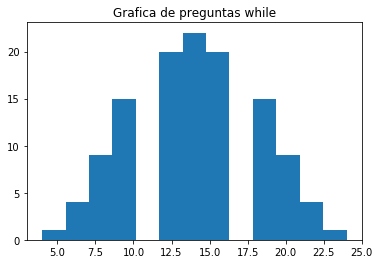

Promedio: 14


In [106]:
plotInsertionSort(5)

Con 6 elementos, se tiene un numero de Permutaciones: 720


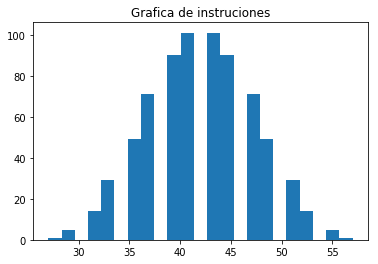

Promedio: 42


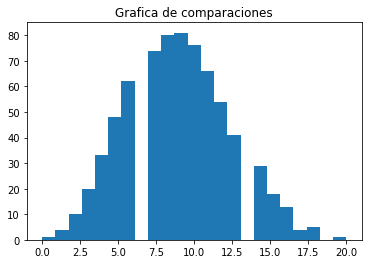

Promedio: 8.95


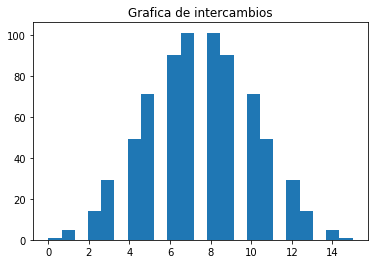

Promedio: 7.5


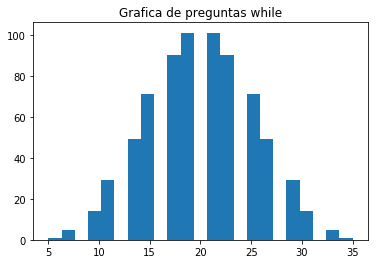

Promedio: 20


In [107]:
plotInsertionSort(6)

Con 7 elementos, se tiene un numero de Permutaciones: 5040


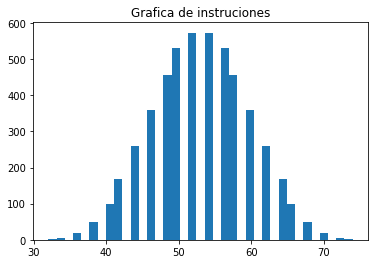

Promedio: 53


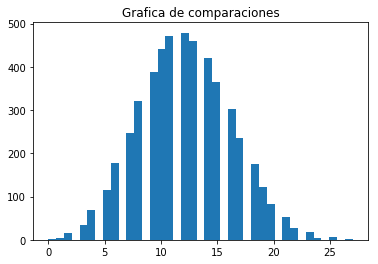

Promedio: 12.092857142857143


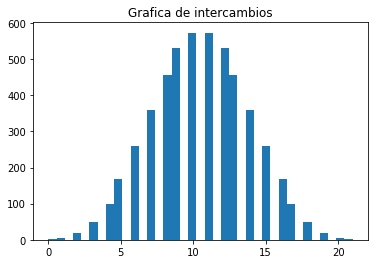

Promedio: 10.5


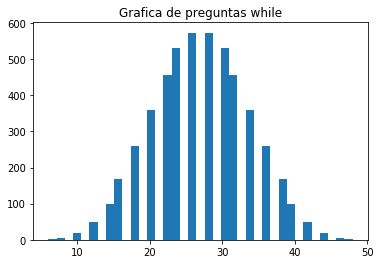

Promedio: 27


In [108]:
plotInsertionSort(7)

Con 8 elementos, se tiene un numero de Permutaciones: 40320


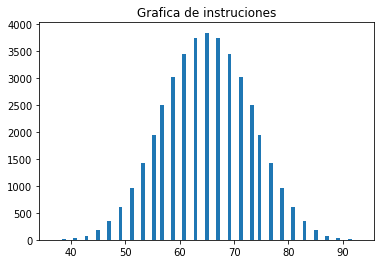

Promedio: 65


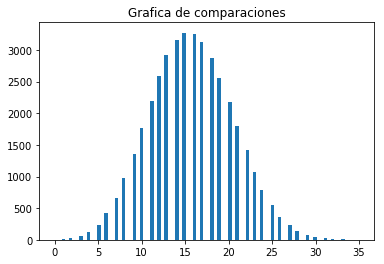

Promedio: 15.717857142857143


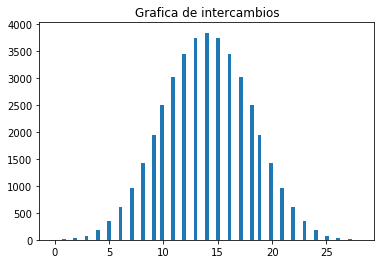

Promedio: 14


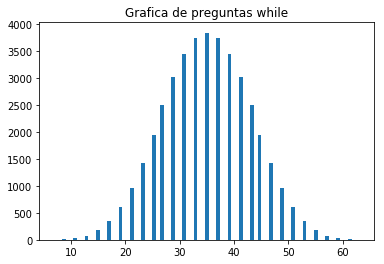

Promedio: 35


In [109]:
plotInsertionSort(8)

Con 9 elementos, se tiene un numero de Permutaciones: 362880


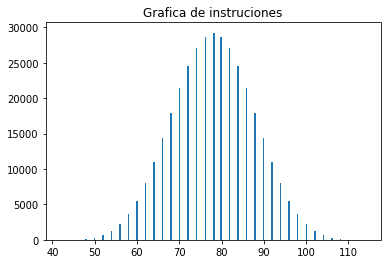

Promedio: 78


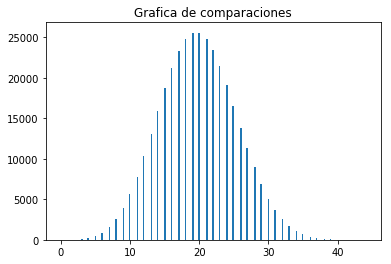

Promedio: 19.828968253968252


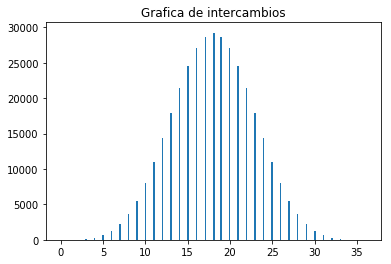

Promedio: 18


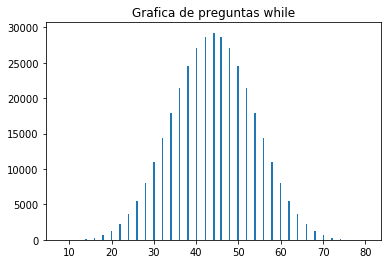

Promedio: 44


In [110]:
plotInsertionSort(9)